In the wake of the first week of the course about plasma physics, we will use some simple integrations to plot different trajectories of charged particles in magnetic and electric fields.

# Charged particles in constant magnetic fields

The equation of motion for a charged particle in a magnetic field is as follows:

$$
\frac{d \vec{v}}{ dt } = \frac{q}{m} (\vec{v} \times \vec{B})
$$

We choose to put the particle in a field that is written 

$$
\vec{B} = B \vec{e_x}
$$

We thus expect the particle to rotate in the $(y, z)$ plane while moving along the $x$ axis. 

Let's see how we can implement this using the integrators found in the scientific python stack.

In [1]:
# imports
import numpy as np
from scipy.integrate import ode

To use `ode`, we need to define the derivatives of velocity, which is computed using the Lorentz force and of position, which is just velocity:

In [2]:
def deriv_velocity(t, y, q, m, B):
    return q / m * B * np.array([0, y[2], -y[1]])

def deriv_position(t, y, v):
    return np.array(v)

Now that we have defined these functions, we can intialize the integrators and their methods.

In [3]:
r_vel = ode(deriv_velocity).set_integrator('dopri5')
r_pos = ode(deriv_position).set_integrator('lsoda')

Finally, we need to define initial conditions:

In [5]:
t0 = 0
x0 = np.array([0, 0, 0])
v0 = np.array([1, 1, 0])

Let's now set the conditions on our integrators and solve the problem using time stepping. We assume the charged particle has unit mass and unit charge.

In [10]:
r_vel.set_initial_value(v0, t0).set_f_params(1.0, 1.0, 1.0)
r_pos.set_initial_value(x0, t0)

positions = []
t1 = 50
dt = 0.05
while r_vel.successful() and r_vel.t < t1:
    r_vel.integrate(r_vel.t+dt)
    r_pos.set_f_params(r_vel.y)
    r_pos.integrate(r_pos.t+dt)
    positions.append(r_pos.y)

positions = np.array(positions)

Let's check the integration results. We expect a circle in the $(y, z)$ plane:

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

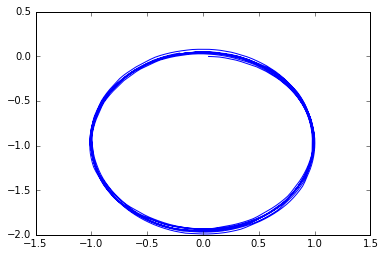

In [12]:
plt.plot(positions[:, 1], positions[:, 2])

Now, let's do some 3D:

In [13]:
import matplotlib as mpl

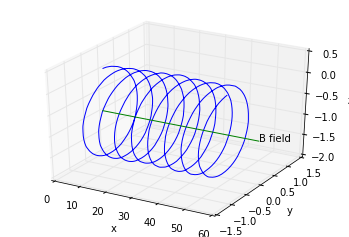

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(positions[:, 0], positions[:, 1], positions[:, 2])

B1 = np.array([x0[0], x0[1], -1])
B2 = np.array([60, 0, 0])
B_axis = np.vstack((B1, B1 + B2))
ax.plot3D(B_axis[:, 0], 
         B_axis[:, 1],
         B_axis[:, 2])
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
ax.text3D((B1 + B2)[0], (B1 + B2)[1], (B1 + B2)[2], "B field")

In [20]:
ax = fig.add_subplot(111, projection='3d')


Here we get the classical result: in a magnetic field, particles loop around the magnetic field axis.

We can do an animation of this type of movement using the code below:

In [15]:
from tempfile import NamedTemporaryFile
import base64 
from matplotlib import animation
VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        f = NamedTemporaryFile(suffix='.mp4', delete=False)
        anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
        f.flush()
        video = open(f.name, "rb").read()
        f.close()
        anim._encoded_video = base64.b64encode(video).decode('utf-8')
    
    return VIDEO_TAG.format(anim._encoded_video)

In [16]:
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

In [145]:
FRAMES = 50
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def init():
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
# animation function.  This is called sequentially
def animate(i):
    current_index = int(positions.shape[0] / FRAMES * i)
    ax.cla()
    ax.plot3D(positions[:current_index, 0], 
              positions[:current_index, 1], 
              positions[:current_index, 2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
# call the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=FRAMES, interval=100)

# call our new function to display the animation
display_animation(anim)

## What happens when the charge is negative? 

Another interesting animation to do is when the charge is negative.

In [147]:
r_vel.set_initial_value(v0, t0).set_f_params(-1.0, 1.0, 1.0)
r_pos.set_initial_value(x0, t0)
positions = []
t1 = 50
dt = 0.05
while r_vel.successful() and r_vel.t < t1:
    r_vel.integrate(r_vel.t+dt)
    r_pos.set_f_params(r_vel.y)
    r_pos.integrate(r_pos.t+dt)
    positions.append(r_pos.y)

positions = np.array(positions)

In [148]:
FRAMES = 50
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def init():
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
# animation function.  This is called sequentially
def animate(i):
    current_index = int(positions.shape[0] / FRAMES * i)
    ax.cla()
    ax.plot3D(positions[:current_index, 0], 
              positions[:current_index, 1], 
              positions[:current_index, 2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
# call the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=FRAMES, interval=100)

# call our new function to display the animation
display_animation(anim)

We see that the particle turns in the other direction, compared to the previous case!

## What happens when the field is stronger?

Another visualization can be done with the same exact initial conditions but with a stronger field. 

In [31]:
r_vel.set_initial_value(v0, t0).set_f_params(1.0, 1.0, 10.0)
r_pos.set_initial_value(x0, t0)

positions2 = []
t1 = 50
dt = 0.01
while r_vel.successful() and r_vel.t < t1:
    r_vel.integrate(r_vel.t+dt)
    r_pos.set_f_params(r_vel.y)
    r_pos.integrate(r_pos.t+dt)
    positions2.append(r_pos.y)

positions2 = np.array(positions2)

Let's now visualize the previous trajectory, as well as the new one together:

In [33]:
FRAMES = 50
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def init():
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
# animation function.  This is called sequentially
def animate(i):
    current_index = int(positions.shape[0] / FRAMES * i)
    ax.cla()
    ax.plot3D(positions[:current_index, 0], 
              positions[:current_index, 1], 
              positions[:current_index, 2])
    ax.plot3D(positions2[:current_index * 5, 0], 
              positions2[:current_index * 5, 1], 
              positions2[:current_index * 5, 2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
# call the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=FRAMES, interval=100)

# call our new function to display the animation
display_animation(anim)

When the field is stronger, the radius of the oscillation, called the Larmor radius, decreases. Also, the frequency of oscillation increases.

The formulas for these quantities are:

$$
\rho = \frac{m v_\perp}{|q| B}
$$

$$
\omega_L = \frac{|q| B}{m}
$$

# Charged particles in constant electric and magnetic fields 

Another phenomenon of interest is when charged particles are subject to a constant electric field and a constant magnetic field. The expected behaviour is that the electric field will introduce a drift, while the magnetic field will just make the particles loop around the field lines.

Here, we will consider that we have:

$$
\vec{B} = B \vec{e_x}
$$

$$
\vec{E} = E \vec{e_y}
$$

We need to redefine our integrators from the previous sections:

In [34]:
def deriv_velocity(t, y, q, m, B, E):
    return q / m  * np.array([0, y[2] * B + E, -y[1] * B])

def deriv_position(t, y, v):
    return np.array(v)

All other parameters stay the same.

In [37]:
r_vel = ode(deriv_velocity).set_integrator('dopri5')
r_pos = ode(deriv_position).set_integrator('lsoda')

In [38]:
r_vel.set_initial_value(v0, t0).set_f_params(1.0, 1.0, 1.0, 10.)
r_pos.set_initial_value(x0, t0)
positions = []
t1 = 50
dt = 0.05
while r_vel.successful() and r_vel.t < t1:
    r_vel.integrate(r_vel.t+dt)
    r_pos.set_f_params(r_vel.y)
    r_pos.integrate(r_pos.t+dt)
    positions.append(r_pos.y)

positions = np.array(positions)

In [39]:
FRAMES = 50
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def init():
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
# animation function.  This is called sequentially
def animate(i):
    current_index = int(positions.shape[0] / FRAMES * i)
    ax.cla()
    ax.plot3D(positions[:current_index, 0], 
              positions[:current_index, 1], 
              positions[:current_index, 2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
# call the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=FRAMES, interval=100)

# call our new function to display the animation
display_animation(anim)

The expected drift is given by the cross product of $\vec{E}$ and $\vec{B}$. In our case this is $\vec{e_y} \times \vec{e_x}$ so as observed above, the drift goes in the negative z direction. It should be noted that the drift does not depend on the charge. This is due to the fact that when averaging the $v_\perp$ value over one gyration of the particle, one gets the following equation:

$$
< m \frac{d \vec{v_\perp}}{dt}> = \vec{0} = q \left( \vec{E_\perp} + <\vec{v_\perp}> \times \vec{B}\right)
$$

In the above equation, $q$ gets simplified, so it has no influence on the average drift of the charged particle.

If instead of E there is an external force, such as gravity, the drift is again in the direction of the force cross the magnetic field. Another important case of drift is when the field lines of B are curved with nonconstant radius: in this case, the particles looping around the field lines of B will feel centrifugal force and will thus escape from the field line. 

It should be noted that except for the $E \times B$ drift, all other drifts depend on the charge of the particle.

# Final simulation: non-constant B and E field with many particles 

To finish off this notebook, we will proceed to simulate many particles at the same time in a constant B field, but with a non-constant periodic E field.

First, we write a function to integrate the trajector of a single particle:

In [91]:
def e_of_x(x):
    return 10 * np.sign(np.sin(2 * np.pi * x / 25))

In [92]:
def compute_trajectory(m, q):
    r_vel.set_initial_value(v0, t0).set_f_params(m, q, 1.0, 10.)
    r_pos.set_initial_value(x0, t0)
    positions = []
    t1 = 200
    dt = 0.05
    while r_vel.successful() and r_vel.t < t1:
        r_vel.set_f_params(m, q, 1.0, e_of_x(r_pos.y[0]))
        r_vel.integrate(r_vel.t+dt)
        r_pos.set_f_params(r_vel.y)
        r_pos.integrate(r_pos.t+dt)
        positions.append(r_pos.y)

    return np.array(positions)

In [96]:
positions = []
for m, q in zip([1, 0.1, 1, 0.1], [1, 1, -1, -1]):
    positions.append(compute_trajectory(m, q))

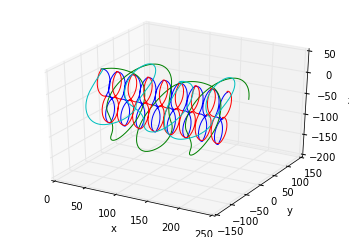

In [97]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for position in positions:
    ax.plot3D(position[:, 0], position[:, 1], position[:, 2])
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')


Let's do an animation with these particles:

In [98]:
FRAMES = 100
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def init():
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
# animation function.  This is called sequentially
def animate(i):
    current_index = int(positions[0].shape[0] / FRAMES * i)
    ax.cla()
    for position in positions:
        ax.plot3D(position[:current_index, 0], 
                  position[:current_index, 1], 
                  position[:current_index, 2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
# call the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=FRAMES, interval=100)

# call our new function to display the animation
display_animation(anim)

The movement is quite difficult to understand. Given the previous sections, can you guess why the 4 particles behave the way they do?

# Conclusions 

This exploration in magnetic and electric fields has enabled us to visualize some of the important properties that charged particles exhibit when in a magnetic and electric field. Hopefully, this has increased your physical intuition about these phenomena.